In [3]:
#此dataset為Pima印第安人5年內糖尿病的發病情況，這邊我們取病人的懷孕情況(pregnant)、體內胰島素含量(insulin)、
#BMI值(bmi)、年齡(age)，來判斷是否發病(label)
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

#讀取資料
pima = pd.read_csv('pima-indians-diabetes.csv')
#用'pregnant','insulin','bmi', 'age' 三個變數預測'label'(是否發病)
df=pima[['pregnant', 'insulin', 'bmi', 'age', 'label']]

In [4]:
#切分訓練 測試資料
from sklearn.model_selection import train_test_split

x=df[['pregnant', 'insulin', 'bmi', 'age']]
y=df[['label']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) #random_state 種子值

x_train.head()

,pregnant,insulin,bmi,age
88,15,110,37.1,43
467,0,100,36.8,25
550,1,0,27.4,21
147,2,119,30.5,34
481,0,0,35.2,29


In [5]:
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

sc.fit(x_train)

x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)

In [6]:
#訓練資料分類效果(3個參數)
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_nor,y_train)

# 印出係數
print(lr.coef_)
# 印出截距
print(lr.intercept_ )

[[ 0.24488348  0.23754034  0.6894904   0.39491445]]
[-0.77677684]


/home/tdtd/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# 計算準確率
survived_predictions = lr.predict(x_test_nor)
#印出以testing data預測之結果
print(survived_predictions)
accuracy = lr.score(x_test_nor, y_test)
#印出準確率
print(accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]
0.705627705628


In [8]:
#定義作圖函數(以下參考用，不建議實作)
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[128  18]
 [ 50  35]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.59  0.41]]


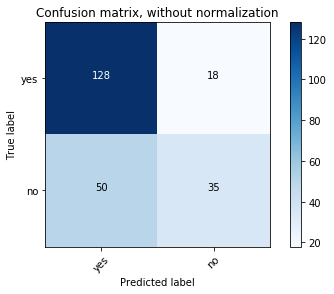

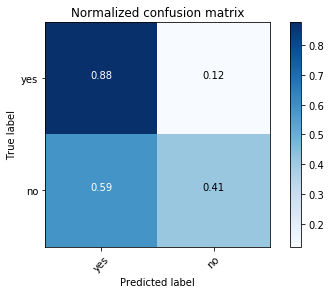

In [9]:
#畫出confusion matrix圖形(結果分為yes, no 2類)
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, survived_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes', 'no'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes', 'no'], normalize=True, title='Normalized confusion matrix')

plt.show()